# Quick Python Intro

***

Welcome! This notebook contains a short introduction to programming in Python to help you get started with the flight dynamics and control notebooks. Most of the content is taken from the analogous notebook of the [CFD Python module](https://github.com/barbagroup/CFDPython) by [Prof. Lorena Barba](http://lorenabarba.com/), with only a few additions here and there, so all credit to her and her collaborators!

Before we get started, remember to do the following:

1. Clone or donwload the repository to your computer.

2. Download and install [Anaconda](https://www.anaconda.com/) on your computer. This will give you access to a distribution of Python with all the needed libraries to work with the notebooks.

3. On your computer go to _Start_ and look for _Anaconda Prompt_. Run it!

4. A command prompt should open. Type `jupyter notebook` and press enter.

5. A new tab in your browser should open. Navigate to the folder where you have cloned or downloaded the repository and open this first notebook. Now you are good to go!

## Libraries

***

Python is a high-level open-source language.  But the _Python world_ is inhabited by many packages or libraries that provide useful things like array operations, plotting functions, and much more. We can import libraries of functions to expand the capabilities of Python in our programs.

OK! We'll start by importing a few libraries to help us out. First: our favorite library is **NumPy**, providing a bunch of useful array operations (similar to MATLAB). We will use it a lot! The second library we need is **Matplotlib**, a 2D plotting library which we will use to plot our results.

In the following cell we are going to import the whole NumPy library and the Pyplot module from the Matplotlib library.

In [1]:
# <-- comments in python are denoted by the pound sign, like this one

import numpy                # we import the array library
from matplotlib import pyplot    # import plotting library

As you can see we use `import x` to import an entire library, while we use `from x import y` to import a specific module of a big library.

To use a function belonging to one of these libraries or modules, we have to tell Python where to look for it. For that, each function name is written following the library name, with a dot in between. For example, if we want to use the NumPy function [`arange()`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html), which returns an array with equally spaced values within a given interval we have to type `numpy.arange()`:

In [2]:
myarray = numpy.arange(10)  # create array within the half-open interval [0, 10) with a default step of 1
myarray

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

If we don't preface the `arange()` function with `numpy`, Python will throw an error.

In [3]:
myarray = arange(0, 5, 10)

NameError: name 'arange' is not defined

We'll come back later on the usefulness of the `arange()` function and we'll also see other ways to create arrays.

**Import style:**

You will often see code snippets that use the following lines
```Python
import numpy as np
import matplotlib.pyplot as plt
```
What's all of this import-as business? It's a way of creating a 'shortcut' to the NumPy library and the Pyplot module. This means that instead of using the `arange()` function typing `numpy.arange()` we'll have to type `np.arange()`. You will see it frequently as it is in common usage, but we prefer to keep out imports explicit. We think it helps with code readability.

**Pro tip:**

Sometimes, you'll see people importing a whole library without assigning a shortcut for it (like `from numpy import *`). This saves typing but is sloppy and can get you in trouble. Best to get into good habits from the beginning!


To learn new functions available to you, visit the [NumPy Reference](http://docs.scipy.org/doc/numpy/reference/) page. If you are a proficient `Matlab` user, there is a wiki page that should prove helpful to you: [NumPy for Matlab Users](http://wiki.scipy.org/NumPy_for_Matlab_Users)

## Variables

***

Python doesn't require explicitly declared variable types like C and other languages.

In [4]:
a = 5        # a is an integer 5
b = 'five'   # b is a string of the word 'five'
c = 5.0      # c is a floating point 5  

In [5]:
type(a)

int

In [6]:
type(b)

str

In [7]:
type(c)

float

Note that if you divide an integer by an integer that yields a remainder, the result will be converted to a float.  (This is *different* from the behavior in Python 2.7, beware!)

## Whitespace in Python

***

Python uses indents and whitespace to group statements together.  To write a short loop in C, you might use:

    for (i = 0, i < 5, i++){
       printf("Hi! \n");
    }

Python does not use curly braces like C, so the same program as above is written in Python as follows:

In [8]:
for i in range(5):  # iterate for i going from 0 to 4
    print("Hi \n")  # print text for each iteration

Hi 

Hi 

Hi 

Hi 

Hi 



If you have nested for-loops, there is a further indent for the inner loop.

In [9]:
for i in range(3):  # iterate for i going from 0 to 2
    for j in range(3):  # iterate for j going from 0 to 2
        print(i, j)  # print i and j
    
    print("This statement is within the i-loop, but not the j-loop")  # print text

0 0
0 1
0 2
This statement is within the i-loop, but not the j-loop
1 0
1 1
1 2
This statement is within the i-loop, but not the j-loop
2 0
2 1
2 2
This statement is within the i-loop, but not the j-loop


## Defining Arrays

***

Let's have a look at some different ways to create arrays with NumPy. We are going to create the same array using three different functions.

Let's start with the `arange()` function, which we have used earlier. As we saw, it creates an array with evenly space values within a given interval. If we use only one argument, `arange(a)`, it generates values within the half-open interval `[0, a)` with a default spacing of 1. If we use two arguments, `arange(a, b)`, it generates values within the half-open interval `[a, b)` with a default spacing of 1. If we use three arguments, `arange(a, b, c)`, it generates values within the half-open interval `[a, b)` with a spacing given by `c`. Let's test it!

In [10]:
myvals = numpy.arange(0, 9, 2)
myvals

array([0, 2, 4, 6, 8])

Ok, now let's create the same array with the [`linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) function. This function also creates an array with evenly spaced numbers over a specified interval, however it does so over a close interval and it allows us to define the number of points that we want to use to divide the interval. This means that when we call `linspace(a, b, c)` we create an array with `c` evenly spaced samples over the close interval `[a, b]`. Have a look.

In [11]:
myvals = numpy.linspace(0, 8, 5)
myvals

array([0., 2., 4., 6., 8.])

If we don't specify the number of samples to generate, `linspace()` will generate 50 samples by default.

Finally, we can also define a NumPy array in a more explicit way. We do this by calling the [`array()`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) function and providing a list as argument, which in Python is defined as a sequence of elements inside square brackets.

In [12]:
myvals = numpy.array([0, 2, 4, 6, 8])
myvals

array([0, 2, 4, 6, 8])

## Slicing Arrays

***

In NumPy, you can look at portions of arrays in the same way as in `Matlab`, with a few extra tricks thrown in.  Let's take an array of values from 1 to 5.

In [13]:
myvals = numpy.array([1, 2, 3, 4, 5])
myvals

array([1, 2, 3, 4, 5])

Python uses a **zero-based index**, so let's look at the first and last element in the array `myvals`

In [14]:
myvals[0], myvals[4]

(1, 5)

There are 5 elements in the array `myvals`, but if we try to look at `myvals[5]`, Python will be unhappy, as `myvals[5]` is actually calling the non-existant 6th element of that array.

In [15]:
myvals[5]

IndexError: index 5 is out of bounds for axis 0 with size 5

Arrays can also be 'sliced', grabbing a range of values.  Let's look at the first three elements

In [16]:
myvals[0:3]

array([1, 2, 3])

Note here, the slice is inclusive on the front end and exclusive on the back, so the above command gives us the values of `myvals[0]`, `myvals[1]` and `myvals[2]`, but not `myvals[3]`.

## Assigning Array Variables

***

One of the strange little quirks/features in Python that often confuses people comes up when assigning and comparing arrays of values.  Here is a quick example.  Let's start by defining a 1-D array called $a$:

In [17]:
a = numpy.linspace(1,5,5)

In [18]:
a

array([1., 2., 3., 4., 5.])

OK, so we have an array $a$, with the values 1 through 5.  I want to make a copy of that array, called $b$, so I'll try the following:

In [19]:
b = a

In [20]:
b

array([1., 2., 3., 4., 5.])

Great.  So $a$ has the values 1 through 5 and now so does $b$.  Now that I have a backup of $a$, I can change its values without worrying about losing data (or so I may think!).

In [21]:
a[2] = 17

In [22]:
a

array([ 1.,  2., 17.,  4.,  5.])

Here, the 3rd element of $a$ has been changed to 17.  Now let's check on $b$.

In [23]:
b

array([ 1.,  2., 17.,  4.,  5.])

And that's how things go wrong!  When you use a statement like $a = b$, rather than copying all the values of $a$ into a new array called $b$, Python just creates an alias (or a pointer) called $b$ and tells it to route us to $a$.  So if we change a value in $a$ then $b$ will reflect that change (technically, this is called *assignment by reference*).  If you want to make a true copy of the array, you have to tell Python to copy every element of $a$ into a new array.  Let's call it $c$.  

In [24]:
c = a.copy()

Now, we can try again to change a value in $a$ and see if the changes are also seen in $c$.  

In [25]:
a[2] = 3

In [26]:
a

array([1., 2., 3., 4., 5.])

In [27]:
c

array([ 1.,  2., 17.,  4.,  5.])

OK, it worked!  If the difference between `a = b` and `a = b.copy()` is unclear, you should read through this again.  This issue will come back to haunt you otherwise.

## Plotting

***

Well done! You've almost completed this quick introduction to Python. Let's have a look at the last bit now: plotting.

We imported the Pyplot module at the beginning of our notebook, so let's use it now. Have a look at how to plot one of the most basic functions: $y=x$.

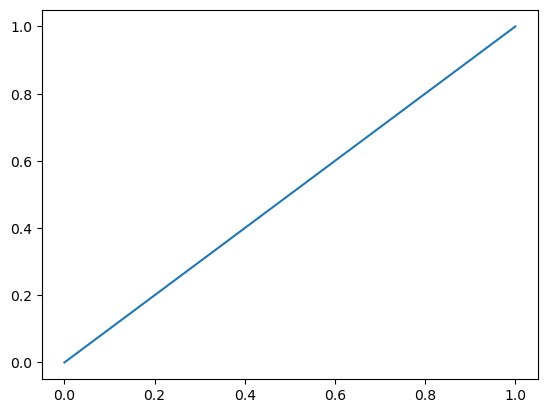

In [28]:
x = numpy.linspace(0, 1)  # define the array of the x variable with equally spaced values going from 0 to 1
y = x  # define the array of the y variable
pyplot.plot(x, y)  # plot y vs x
pyplot.show()  # display all open figures

Pretty easy, isn't it? We can also make our plot look nicer adding labels to the $x$ and the $y$ axes and some grid lines.

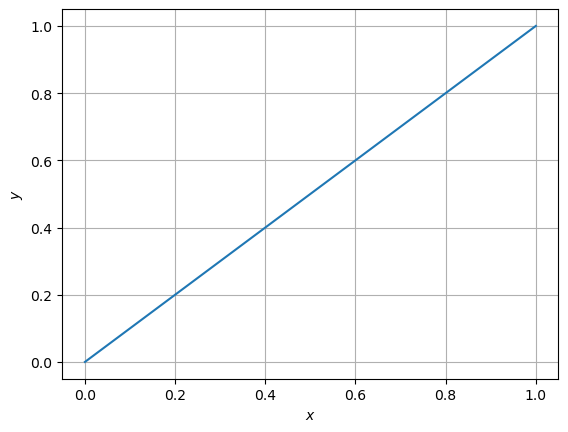

In [29]:
pyplot.plot(x, y)  # plot y vs x
pyplot.xlabel('$x$')  # set the label for the x-axis
pyplot.ylabel('$y$')  # set the label for the y-axis
pyplot.grid()  # configure the grid lines
pyplot.show()  # display all open figures

Note how we have typed `'$x$'` and `'$y$'` to use the equivalent of LaTeX's math mode. In fact with Pyplot has an internal LaTeX parser and layout engine that allows us to use all our favorite mathematical commands! Isn't this amazing?

Ok, let's say we want to plot another function in the same plot, say $y=x^2$, having a different color and a legend to identify each curve. How can we do it? Have a look at the following code.

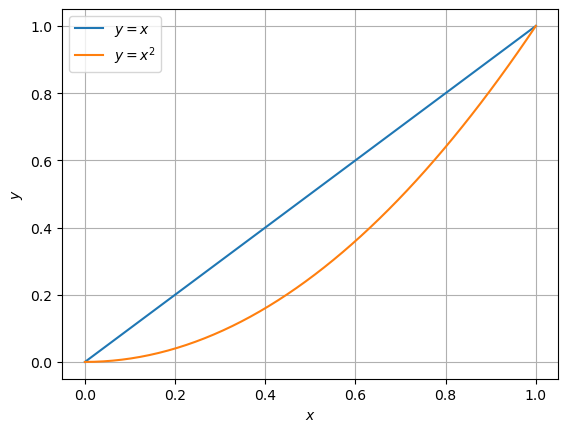

In [30]:
fig, ax = pyplot.subplots()  # create a figure with one plot
ax.plot(x, y, label='$y=x$')  # plot y vs x
y2 = x**2  # define array of the y variable for the function y=x^2
ax.plot(x, y2, label='$y=x^2$')  # plot y2 vs x
ax.legend()  # place legend in the plot
pyplot.xlabel('$x$')  # set the label for the x-axis
pyplot.ylabel('$y$')  # set the label for the y-axis
pyplot.grid()  # configure the grid lines
pyplot.show()  # display all open figures

Pretty neat ah? We have used the `subplots()` function to create a figure with one plot, so one set of axes that was returned into the `ax` variable. Then we used the `plot()` function with the `label=` argument to give a name to each curve. Finally, we called the `legend()` function to place the legend in our plot.

Ok all good, however I bet you are wondering _"why did we type `ax.plot()` and `ax.legend()` instead of `pyplot.plot()` ad `pyplot.legend()`?"_ Here is where things get slighlty more complicated. In fact Python is a so-called object-oriented programming language and the `ax` variable is actually an object of the `AxesSubplot` class. `plot()` and `legend()` are methods of the `AxesSubplot` class, that is to say functions that can be called from the objects of that class.

If you have never heard about object-oriented programming I bet your head may be turning a little. Don't worry, you don't need to know anything of all this classes, objects and methods business for now. If you want to have an understanding of the concepts related to object-oriented programming in Python, there are plenty of resources on the internet, and you may start reading [here](https://realpython.com/python3-object-oriented-programming/). Otherwise, you can move ahead serenely, just keep in mind that sometimes we will call functions from a variable instead of a library.

Now one last trick about plotting. Let's say we have a function like $y=1/(1-x)$, which has a vertical asymptote for $x=1$. The function will go to $+\inf$ when we approach $x=1$ from the left and to $-\inf$ when we approach $x=1$ from the right. It would be nice to visualize the $x=1$ boundary with a vertical line, wouldn't it? Well with Pyplot we can do that simply using the `axvline()` function.

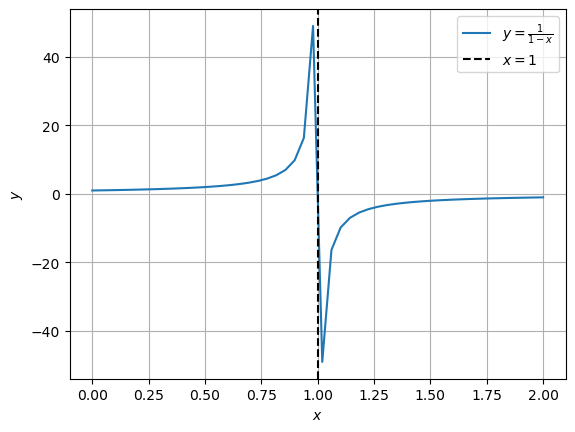

In [31]:
x = numpy.linspace(0, 2)  # define the array of the x variable with equally spaced values going from 0 to 2
y = 1/(1 - x)  # define array of the y variable
fig, ax = pyplot.subplots()  # create a figure with one plot
ax.plot(x, y, label='$y=\\frac{1}{1-x}$')  # plot y vs x
ax.axvline(x=1, color='k', ls='--', label='$x=1$')  # plot x=1 line
ax.legend()  # place legend in the plot
pyplot.xlabel('$x$')  # set the label for the x-axis
pyplot.ylabel('$y$')  # set the label for the y-axis
pyplot.grid()  # configure the grid lines
pyplot.show()  # display all open figures

Let's note a couple of things. In the string used for the `label=` argument of the $y=1/(1-x)$ curve we used a double backslash. Why? Well, we wanted to use the mathematical command `\frac` to write a fraction, however the backslash is a special character in Python strings, as it is used to "escape" illegal characters. For example, we cannot type a double quote `"` in a string, instead it has to be preceded by a backslash `\"`. In the same way, to write a backslash in a string we need to precede it with another backslash. If you want, you can read more about escape characters [here](https://www.w3schools.com/python/gloss_python_escape_characters.asp).

Finally, when we used `axvline()` we specified the name of each argument, as we did previously for `label=`. We used `x=1` to set the line at $x=1$, `color='k'` to have a black like, `ls='--` to have a dashed line, and `label='$x=1$'` to give a name to the curve. These are called "keyword arguments" and they represent a way of passing values into a function with a `key=value` syntax, where we need to employ the parameter names used in the definition of the function. It's a nice way make our code more explicit, because one of the golden rules of good Python programming is indeed _explicit is better than implicit_! Again, if you want, you can read more about keyword arguments in Python [here](https://www.geeksforgeeks.org/keyword-and-positional-argument-in-python/).

## Learn More

***

There are a lot of resources online to learn more about using NumPy and other libraries. Just for kicks, here we use Jupyter's feature for embedding videos to point you to a short video on YouTube on using NumPy arrays.

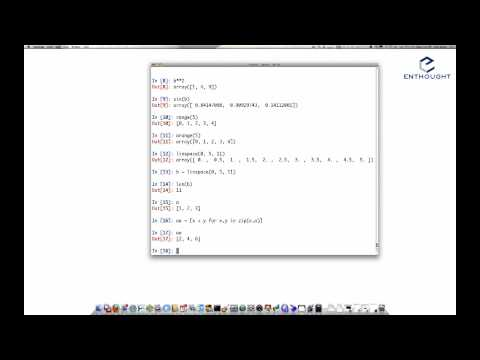

In [32]:
from IPython.display import YouTubeVideo
# a short video about using NumPy arrays, from Enthought
YouTubeVideo('vWkb7VahaXQ')

As far as Pyplot is concerned, [this official tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) by the Matplotlib project is highly recommended.

And remember, Google is your best friend when something is not working!